# Kleines Tutorial zum einbinden des Datensatzes

Ihr erstellt in euren Google Drive den Ordner "Kaggle"
Dort kopiert ihr die kaggle.json hin, die ihr erhaltet, wenn ihr in eurem Kaggle Profil auf Create New API Token klickt. 
Dann ladet ihr euch mit den Befehlen unten den Datensatz im tfrec (tensor flow record)-Format herunter und wandelt ihn in einen Pytorch-Datensatz um.

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"# /content/gdrive/My Drive/Kaggle is the path where kaggle.json is present in the Google Drive

In [ ]:
#changing the working directory
%cd /content/gdrive/My Drive/Kaggle
#Check the present working directory using pwd command

/content/gdrive/My Drive/Kaggle


In [ ]:
!kaggle competitions download -c gan-getting-started

  0% 0.00/13.5k [00:00<?, ?B/s]
100% 13.5k/13.5k [00:00<00:00, 2.01MB/s]
  0% 0.00/8.27k [00:00<?, ?B/s]
100% 8.27k/8.27k [00:00<00:00, 1.11MB/s]
  0% 0.00/16.4k [00:00<?, ?B/s]
100% 16.4k/16.4k [00:00<00:00, 2.33MB/s]
  0% 0.00/14.4k [00:00<?, ?B/s]
100% 14.4k/14.4k [00:00<00:00, 1.91MB/s]
  0% 0.00/9.20k [00:00<?, ?B/s]
100% 9.20k/9.20k [00:00<00:00, 1.67MB/s]
  0% 0.00/9.82k [00:00<?, ?B/s]
100% 9.82k/9.82k [00:00<00:00, 1.26MB/s]
  0% 0.00/22.8k [00:00<?, ?B/s]
100% 22.8k/22.8k [00:00<00:00, 3.10MB/s]
  0% 0.00/8.17k [00:00<?, ?B/s]
100% 8.17k/8.17k [00:00<00:00, 2.09MB/s]
  0% 0.00/10.9k [00:00<?, ?B/s]
100% 10.9k/10.9k [00:00<00:00, 1.50MB/s]
  0% 0.00/15.3k [00:00<?, ?B/s]
100% 15.3k/15.3k [00:00<00:00, 2.10MB/s]
  0% 0.00/8.66k [00:00<?, ?B/s]
100% 8.66k/8.66k [00:00<00:00, 2.10MB/s]
  0% 0.00/13.5k [00:00<?, ?B/s]
100% 13.5k/13.5k [00:00<00:00, 1.84MB/s]
  0% 0.00/4.28k [00:00<?, ?B/s]
100% 4.28k/4.28k [00:00<00:00, 580kB/s]
  0% 0.00/10.1k [00:00<?, ?B/s]
100% 10.1k/10.1k [00

In [ ]:
#unzipping the zip files and deleting the zip files
!unzip \*.zip  && rm *.zip

Archive:  monet16-60.tfrec.zip
  inflating: monet16-60.tfrec        

Archive:  monet04-60.tfrec.zip
  inflating: monet04-60.tfrec        

Archive:  monet00-60.tfrec.zip
  inflating: monet00-60.tfrec        

Archive:  monet08-60.tfrec.zip
  inflating: monet08-60.tfrec        

Archive:  monet12-60.tfrec.zip
  inflating: monet12-60.tfrec        

Archive:  photo11-352.tfrec.zip
  inflating: photo11-352.tfrec       

Archive:  photo03-352.tfrec.zip
  inflating: photo03-352.tfrec       

Archive:  photo07-352.tfrec.zip
  inflating: photo07-352.tfrec       

Archive:  photo17-352.tfrec.zip
  inflating: photo17-352.tfrec       

Archive:  photo13-352.tfrec.zip
  inflating: photo13-352.tfrec       

Archive:  photo14-352.tfrec.zip
  inflating: photo14-352.tfrec       

Archive:  photo15-352.tfrec.zip
  inflating: photo15-352.tfrec       

Archive:  photo01-352.tfrec.zip
  inflating: photo01-352.tfrec       

Archive:  photo12-352.tfrec.zip
  inflating: photo12-352.tfrec       

Archive:  p

In [ ]:
!ls

00068bc07f.jpg	00c6a0ad1e.jpg	0e3b3292da.jpg	      photo04-352.tfrec
000910d219.jpg	00dcf0f1e3.jpg	106757e5d8.jpg	      photo05-352.tfrec
000c1e3bff.jpg	00dff09ebe.jpg	1078363ff0.jpg	      photo06-352.tfrec
000ded5c41.jpg	00e1798585.jpg	10c555c1b1.jpg	      photo07-352.tfrec
00104fd531.jpg	011835cfbf.jpg	118da0690c.jpg	      photo08-352.tfrec
001158d595.jpg	0260d15306.jpg	11ab570c5e.jpg	      photo09-352.tfrec
0033c5f971.jpg	049e293b93.jpg	KaggleDownload.ipynb  photo10-352.tfrec
0039ebb598.jpg	05144e306f.jpg	kaggle.json	      photo11-352.tfrec
003aab6fdd.jpg	052a77c020.jpg	monet00-60.tfrec      photo12-352.tfrec
003c6c30e0.jpg	058f878b7c.jpg	monet04-60.tfrec      photo13-352.tfrec
00479e2a21.jpg	05b493ff42.jpg	monet08-60.tfrec      photo14-352.tfrec
005f987f56.jpg	064487d630.jpg	monet12-60.tfrec      photo15-352.tfrec
0080f94ebc.jpg	066fe4cbaa.jpg	monet16-60.tfrec      photo16-352.tfrec
00882b7e1d.jpg	07fcaee35f.jpg	photo00-352.tfrec     photo17-352.tfrec
009d534136.jpg	09b76b6471.jpg	

## Preliminaries

In [ ]:
import glob
train_files = glob.glob("monet*.tfrec")
print(train_files)

['monet00-60.tfrec', 'monet08-60.tfrec', 'monet04-60.tfrec', 'monet12-60.tfrec', 'monet16-60.tfrec']


In [ ]:
# importing tensorfow to read .tfrec files
import tensorflow as tf
# Create a dictionary describing the features.
train_feature_description = {
    'image': tf.io.FixedLenFeature([], tf.string),
}

def _parse_image_function(example_proto):
 return tf.io.parse_single_example(example_proto, train_feature_description)

In [ ]:
train_images = []
for i in train_files:
  train_image_dataset = tf.data.TFRecordDataset(i)
  train_image_dataset = train_image_dataset.map(_parse_image_function)
  images = [image_features['image'].numpy() for image_features in train_image_dataset]
  train_images = train_images + images

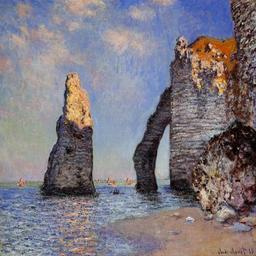

In [ ]:
import IPython.display as display
display.display(display.Image(data=train_images[24]))

In [ ]:
from PIL import Image
import cv2
import albumentations
import torch
import numpy as np
import io
from torch.utils.data import Dataset

In [ ]:
class MonetDataset(Dataset):
  #Resize dataset, normalise data and augment if is_valid = 0
  def __init__(self, image, img_height, img_width, mean = (0, 0, 0), std  = (1, 1, 1), is_valid = 1):
    self.image = image
    self.img_height = img_height
    self.img_width = img_width
    self.is_valid  = is_valid
    if self.is_valid == 1:
      self.aug = albumentations.Compose([
                                         albumentations.Resize(img_height, img_width, always_apply = True),
                                         albumentations.Normalize(mean, std, always_apply = True)
      ])
    else:
      #Apply affine transformations to scale, shift and rotate input images
      self.aug = albumentations.Compose([
                                         albumentations.Resize(img_height, img_width, always_apply = True),
                                         albumentations.Normalize(mean, std, always_apply = True),
                                         albumentations.ShiftScaleRotate(shift_limit = 0.0625, 
                                                                         scale_limit = 0.1, 
                                                                         rotate_limit = 5,
                                                                         p = 0.9)
      ])

  def __len__(self):
    return len(train_images)

  def __getitem__(self, index):
    img = np.array(Image.open(io.BytesIO(self.image[index]))) # Converting images from bytes to numpy array
    img = cv2.resize(img, dsize=(self.img_width, self.img_height), interpolation = cv2.INTER_CUBIC)
    img = self.aug(image = img)["image"]
    img = np.transpose(img, (2,0,1)).astype(np.float32) # changing format s.t. pytorch will accept it
    return torch.tensor(img, dtype = torch.float)

In [ ]:
train_dataset = MonetDataset(image = train_images, img_height = 32, img_width = 32)

tensor([[[0.6784, 0.5686, 0.6627,  ..., 0.7333, 0.6980, 0.6588],
         [0.7255, 0.5882, 0.6118,  ..., 0.6667, 0.6824, 0.6235],
         [0.6588, 0.5294, 0.5451,  ..., 0.6980, 0.7098, 0.6706],
         ...,
         [0.6667, 0.6824, 0.7059,  ..., 0.2314, 0.3725, 0.3529],
         [0.6824, 0.5961, 0.5882,  ..., 0.2078, 0.2784, 0.2745],
         [0.6980, 0.6745, 0.6706,  ..., 0.2824, 0.3059, 0.2824]],

        [[0.5922, 0.5922, 0.5176,  ..., 0.6196, 0.5725, 0.5451],
         [0.6000, 0.5608, 0.5255,  ..., 0.5647, 0.5647, 0.5294],
         [0.5922, 0.5451, 0.5216,  ..., 0.5843, 0.5843, 0.5608],
         ...,
         [0.4784, 0.5137, 0.5059,  ..., 0.2314, 0.3137, 0.3059],
         [0.5059, 0.4510, 0.4549,  ..., 0.2510, 0.2980, 0.2549],
         [0.5098, 0.4980, 0.5059,  ..., 0.2627, 0.2392, 0.2157]],

        [[0.4235, 0.5137, 0.3490,  ..., 0.4627, 0.3922, 0.3725],
         [0.4392, 0.5020, 0.4157,  ..., 0.4392, 0.4118, 0.3922],
         [0.4471, 0.4314, 0.4039,  ..., 0.4118, 0.4196, 0.

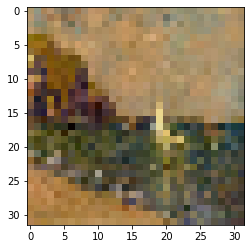

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
id = 91
img = train_dataset[id]
print(img)
npimg = img.numpy()
plt.imshow(np.transpose(npimg, (1, 2, 0)))

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable
from torchvision.utils import save_image

import matplotlib.pyplot as plt
import numpy as np

if torch.cuda.is_available():
    device = 'cuda'
else:
    device = 'cpu'
print(device)

batch_size = 10

# MNIST Dataset
#train_dataset = datasets.MNIST(root='./mnist_data/', train=True, transform=transforms.ToTensor(), download=True)
#test_dataset = datasets.MNIST(root='./mnist_data/', train=False, transform=transforms.ToTensor(), download=False)

# Data Loader (Input Pipeline)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=False)
#test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

img_width = 32
img_height = 32

cuda
